In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [3]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy : 'str'; 'MW', 'M31', 'M33'
            name of galaxy to be analyzed
        start : 'int'
            number of first snapshot to be analyzed 
        end : 'int'
            number of last snapshot to be analyzed
        n : 'int'
            increment between each successive snapshot number to be analyzed
            
    outputs: 
        datafile 'Orbit_[galaxy].txt' containing time series with array of position components and velocity 
        components. Saved to directory, not returned
    """
    
    # compose the filename for output
    fileout = f"Orbit_{galaxy}.txt"

    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1 # tolerance for iterative COM calculation
    volDec = 2 # factor to shrink sphere for iterative COM calculation
    if galaxy == 'M33': # stricter factor to shrink sphere for M33 due to severe tidal stripping
        volDec = 4
    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start, end, n) # array of snap numbers
    if len(snap_ids) < 1: # check if array is valid
        raise ValueError('Bad array of snapshots: make sure that start < end and n is positive')
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros((len(snap_ids), 7)) # empty array to store parameters of orbit
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids):  # loop over files
        
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_id) # add a string of the filenumber to the value “000”
        ilbl = ilbl[-3:] # remove all but the last 3 digits
        # compose filename for each snap number being iterated
        filename = f'{galaxy}_VLowRes/' + '%s_'%(galaxy) + ilbl + '.txt' 
        
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, ptype=2)
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_p = COM.COM_P(delta, volDec) # galaxy position COM
        COM_v = COM.COM_V(COM_p[0], COM_p[1], COM_p[2]) # galaxy COM velocity
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i] = COM.time.value/1000, *tuple(COM_p.value), *tuple(COM_v.value)
        
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [4]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM('MW', 0, 800, 5) # MW COM file
OrbitCOM('M31', 0, 800, 5) # M31 COM file
OrbitCOM('M33', 0, 800, 5) # M33 COM file

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500


In [5]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MW_orbit = np.genfromtxt('Orbit_MW.txt', names=True) # Read in MW COM file
M31_orbit = np.genfromtxt('Orbit_M31.txt', names=True) # Read in M31 COM file
M33_orbit = np.genfromtxt('Orbit_M33.txt', names=True) # Read in M33 COM file

In [6]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def vector_magnitude(v1, v2):
    """function that determines the magnitude of the difference in two vectors. If the vectors are 2D
    arrays of the same length, then the function will compute the magnitude of the difference vector
    at each row in the input.
    inputs:
        v1 : 'numpy array'
            first vector to be analyzed
        v2 : 'numpy array'
            second vector to be analyzed
            
    outputs: 
        'float' or 'numpy array'
            if the vectors are 1D, float of the magnitude of their difference.
            if the vectors are 2D, array of difference vector magnitudes.
        
    """
    if v1.shape != v2.shape: # check if vectors have same dimension and length
        raise ValueError("Input vectors must have same shape.")
    return np.linalg.norm((v1-v2), axis=0) # return magnitude of each row (single row if 1D vectors)

In [7]:
# Determine the magnitude of the relative position and velocities 
MW_position = np.array((MW_orbit['x'], MW_orbit['y'], MW_orbit['z'])) # Position vector of MW COM
M31_position = np.array((M31_orbit['x'], M31_orbit['y'], M31_orbit['z'])) # Position vector of M31 COM
M33_position = np.array((M33_orbit['x'], M33_orbit['y'], M33_orbit['z'])) # Position vector of M33 COM
MW_velocity = np.array((MW_orbit['vx'], MW_orbit['vy'], MW_orbit['vz'])) # Velocity vector of MW COM
M31_velocity = np.array((M31_orbit['vx'], M31_orbit['vy'], M31_orbit['vz'])) # Velocity vector of M31 COM
M33_velocity = np.array((M33_orbit['vx'], M33_orbit['vy'], M33_orbit['vz'])) # Velocity vector of M33 COM

# of MW and M31
MW_M31_separation_distance = vector_magnitude(MW_position, M31_position) # Relative separation between MW and M31
MW_M31_relative_velocity_magnitude = vector_magnitude(MW_velocity, M31_velocity) # Relative speed between MW and M31

# of M33 and M31
M33_M31_separation_distance = vector_magnitude(M33_position, M31_position) # Relative separation between M33 and M31
M33_M31_relative_velocity_magnitude = vector_magnitude(M33_velocity, M31_velocity) # Relative speed between M33 and M31

Text(0, 0.5, 'Separation Distance (kpc)')

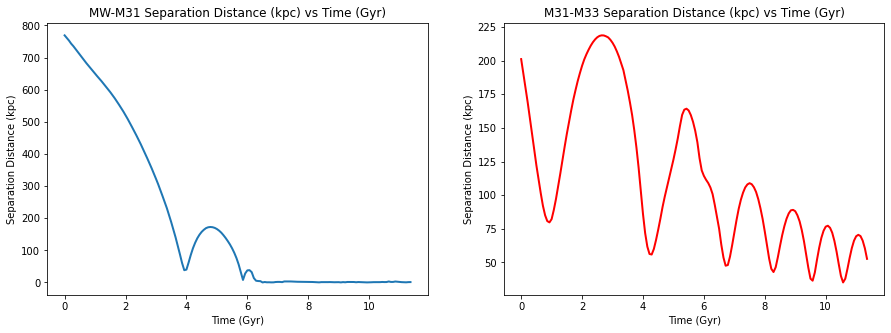

In [8]:
# Plot the Orbit of the galaxies 
#################################
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # 2 plots, one for each galaxy pair
ax[0].plot(MW_orbit['t'], MW_M31_separation_distance, lw=2) # MW-M31 separation distance
ax[0].set_title('MW-M31 Separation Distance (kpc) vs Time (Gyr)')
ax[0].set_xlabel('Time (Gyr)')
ax[0].set_ylabel('Separation Distance (kpc)')
ax[1].plot(MW_orbit['t'], M33_M31_separation_distance, c='red', lw=2) # M31-M33 separation distance
ax[1].set_title('M31-M33 Separation Distance (kpc) vs Time (Gyr)')
ax[1].set_xlabel('Time (Gyr)')
ax[1].set_ylabel('Separation Distance (kpc)')

Text(0, 0.5, 'Relative Velocity Magnitude (km/s)')

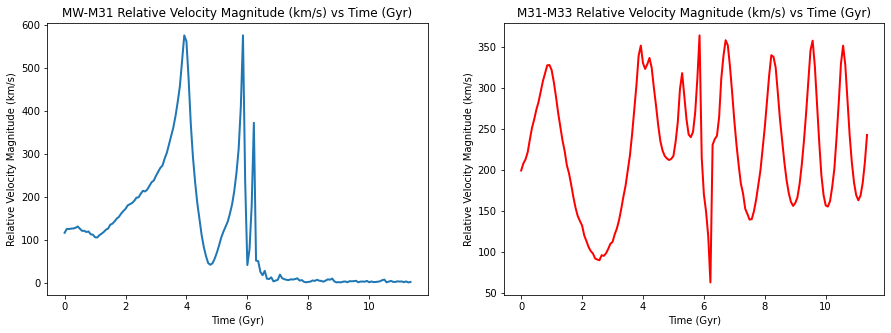

In [9]:
# Plot the orbital velocities of the galaxies 
#################################
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # 2 plots, one for each galaxy pair
ax[0].plot(MW_orbit['t'], MW_M31_relative_velocity_magnitude, lw=2) # MW-M31 relative speed
ax[0].set_title('MW-M31 Relative Velocity Magnitude (km/s) vs Time (Gyr)')
ax[0].set_xlabel('Time (Gyr)')
ax[0].set_ylabel('Relative Velocity Magnitude (km/s)')
ax[1].plot(MW_orbit['t'], M33_M31_relative_velocity_magnitude, c='red', lw=2) # M31-M33 relative speed
ax[1].set_title('M31-M33 Relative Velocity Magnitude (km/s) vs Time (Gyr)')
ax[1].set_xlabel('Time (Gyr)')
ax[1].set_ylabel('Relative Velocity Magnitude (km/s)')

# Questions
## 1) How many close encounters will the MW and M31 experience in the future?
From a visual analysis, it appears that the two galaxies will have two close encounters, passing through each other, before finally merging.

## 2) How is the time evolution of the separation and relative velocity related?
The velocity and separation distance between each pair of galaxies seem to be inversely related - as the separation distance between galaxies decreases, the velocity goes up. This makes sense, as the situation is essentially a damped harmonic oscillator. As the galaxies plunge into each other, their gravitational potential energy is converted into kinetic energy. Their momentum carries them past each other, converting that kinetic energy back into potential, which is the exact condition for oscillation. The damping force is supplied by dynamical friction.

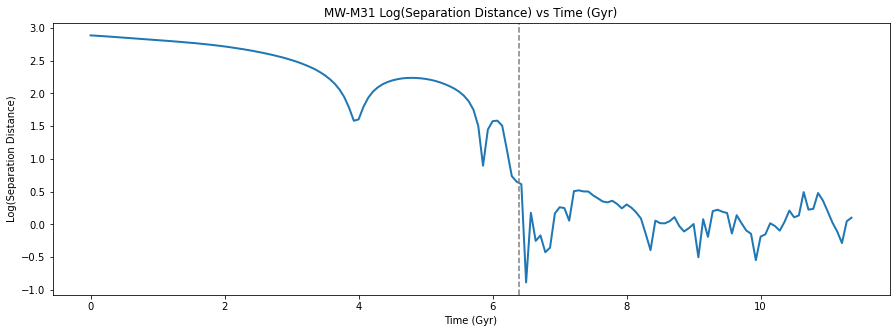

In [10]:
fig, ax = plt.subplots(figsize=(15, 5)) # log-linear plot of MW-M31 separtion distance vs time to examine merger time
ax.plot(MW_orbit['t'], np.log10(MW_M31_separation_distance), lw=2) # MW-M31 separation distance
ax.set_title('MW-M31 Log(Separation Distance) vs Time (Gyr)')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Log(Separation Distance)')
ax.axvline(6.4, c='grey', ls='--')

## 3) When do M31 and the MW merge?
From the log-linear plot above, it appears that M31 and the MW reach their final state at approximately t = 6.4 Gyr.

Estimated decay rate of M33 orbit: 1.39e+01 kpc/Gyr
Decay time from initial orbit of 75 kpc from estimated decay rate: 5.4 Gyr


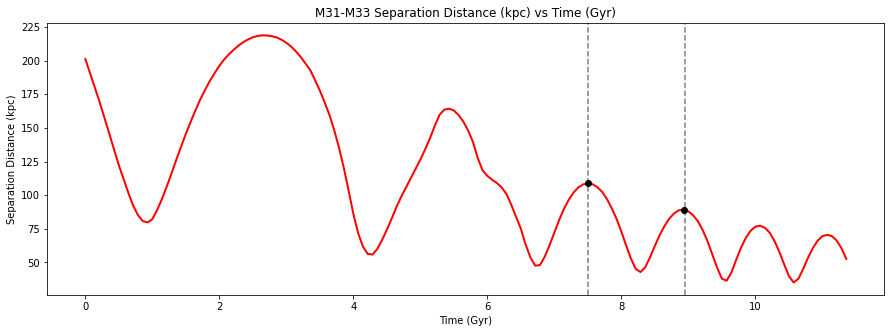

In [11]:
fig, ax = plt.subplots(figsize=(15, 5)) # Separation plot of M31-M33 to investigate decay rate of M33 orbit
ax.plot(MW_orbit['t'], M33_M31_separation_distance, c='red', lw=2) # M31-M33 separation distance
ax.set_title('M31-M33 Separation Distance (kpc) vs Time (Gyr)')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Separation Distance (kpc)')
ax.axvline(7.500, c='grey', ls='--') # position of first peak in separation distance after 6 Gyr
ax.axvline(8.950, c='grey', ls='--') # position of another peak in separation at ~9 Gyr
peak_1_index = 105 # index in timeseries corresponding to first marked peak, plot point to visualize
ax.scatter(MW_orbit['t'][peak_1_index], M33_M31_separation_distance[peak_1_index], c='k', zorder=2)
peak_2_index = 125 # index in timeseries corresponding to second marked peak, plot point to visualize
ax.scatter(MW_orbit['t'][peak_2_index], M33_M31_separation_distance[peak_2_index], c='k', zorder=2)
# calculate the difference in separation distances (kpc) between these two points
peak_separation_decay = (M33_M31_separation_distance[peak_2_index]-M33_M31_separation_distance[peak_1_index])
# difference in time (Gyr) between these two points
peak_separation_time = (MW_orbit['t'][peak_2_index]-MW_orbit['t'][peak_1_index])
# divide the change in separation distance by time between peaks to estimate decay rate
separation_decay_rate = abs(peak_separation_decay/peak_separation_time)
print(f"Estimated decay rate of M33 orbit: {separation_decay_rate:.2e} kpc/Gyr")
print(f"Decay time from initial orbit of 75 kpc from estimated decay rate: {75/separation_decay_rate:.2} Gyr")

## 4) What is roughly the decay rate of M33’s orbit after 6 Gyr? If this rate is constant, how long will it take M33 to merge with the combined MW+M31 remnant if it is at a distance of 75 kpc?
The decay rate can be estimated by dividing the difference in separation distance between successive apocenters and dividing by the time between them. From this calculation, using the first peaks in separation distance after 6 Gyr, a decay rate o approximately 14 kpc/Gyr is estimated. Starting from an initial orbit of 75 kpc, M33 would then be estimated to merge with the MW-M31 merger remnant in approximately 5.4 Gyr.